In [1]:
import pandas as pd

pcrs = pd.read_csv('covid19-data/csv/pcrs_region.csv')
pcrs

,codigo,region,04/09/2020,04/10/2020,04/11/2020,04/12/2020,04/13/2020,04/14/2020,04/15/2020
0,15,Arica y Parinacota,70,0,93,103,0,93,24
1,1,Tarapacá,0,0,0,0,0,0,0
2,2,Antofagasta,182,128,107,175,103,95,117
3,3,Atacama,57,52,60,25,20,22,25
4,4,Coquimbo,0,0,0,0,0,0,0
5,5,Valparaíso,301,249,248,273,223,92,385
6,13,Metropolitana,5383,3185,2105,3861,1850,1656,2694
7,6,O’Higgins,68,0,74,0,113,30,30
8,7,Maule,397,219,0,341,65,160,0
9,16,Ñuble,364,0,259,189,0,0,0


In [75]:
long_regiones = pd.read_csv('covid19-data/csv/long_regiones.csv')
positivos = long_regiones.pivot(index='region', columns='fecha', values='positivos_nuevos')[pcrs.columns[2:]]
positivos

fecha,04/09/2020,04/10/2020,04/11/2020,04/12/2020,04/13/2020,04/14/2020,04/15/2020
region,,,,,,,
Antofagasta,15.0,18.0,7.0,21.0,11.0,6.0,21.0
Araucanía,20.0,23.0,27.0,36.0,20.0,21.0,10.0
Arica y Parinacota,12.0,12.0,20.0,8.0,0.0,5.0,4.0
Atacama,2.0,3.0,0.0,0.0,0.0,0.0,0.0
Aysén,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Biobío,21.0,14.0,16.0,10.0,12.0,16.0,14.0
Coquimbo,5.0,0.0,3.0,2.0,0.0,0.0,0.0
Los Lagos,15.0,9.0,15.0,8.0,8.0,5.0,5.0
Los Ríos,4.0,6.0,6.0,5.0,3.0,10.0,2.0


In [77]:
positivos.query("region == 'Maule'").iloc[0]

fecha
04/09/2020     9.0
04/10/2020     3.0
04/11/2020     3.0
04/12/2020     4.0
04/13/2020     3.0
04/14/2020     1.0
04/15/2020    10.0
Name: Maule, dtype: float64

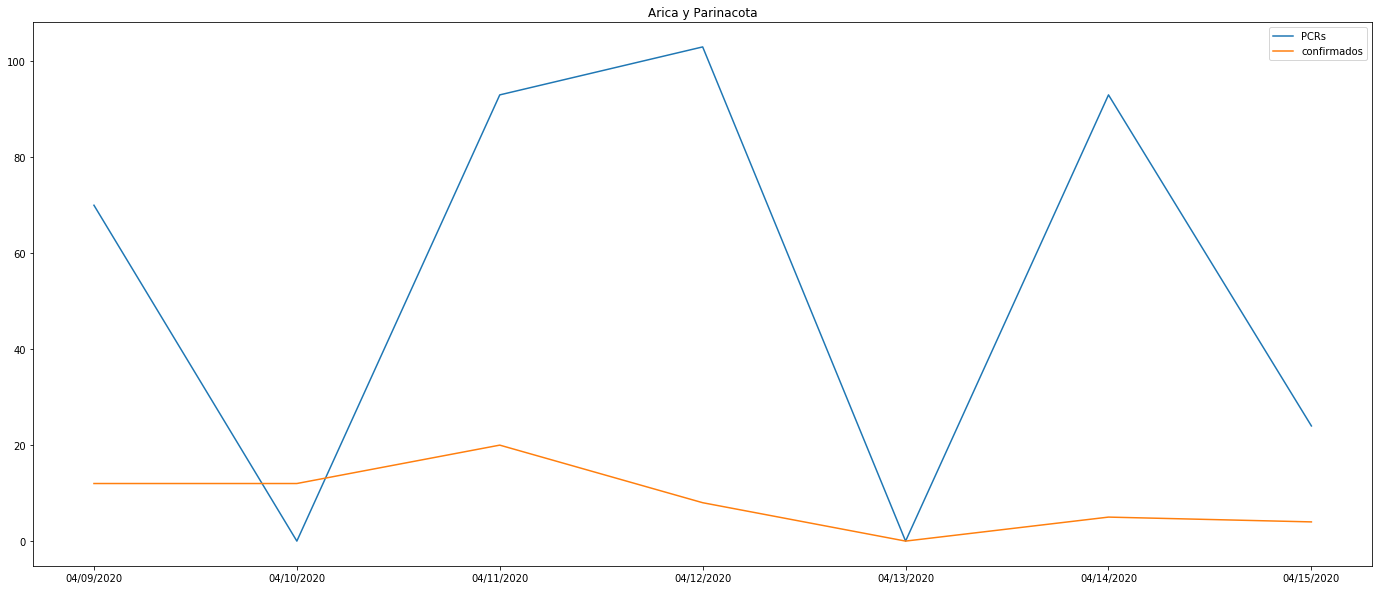

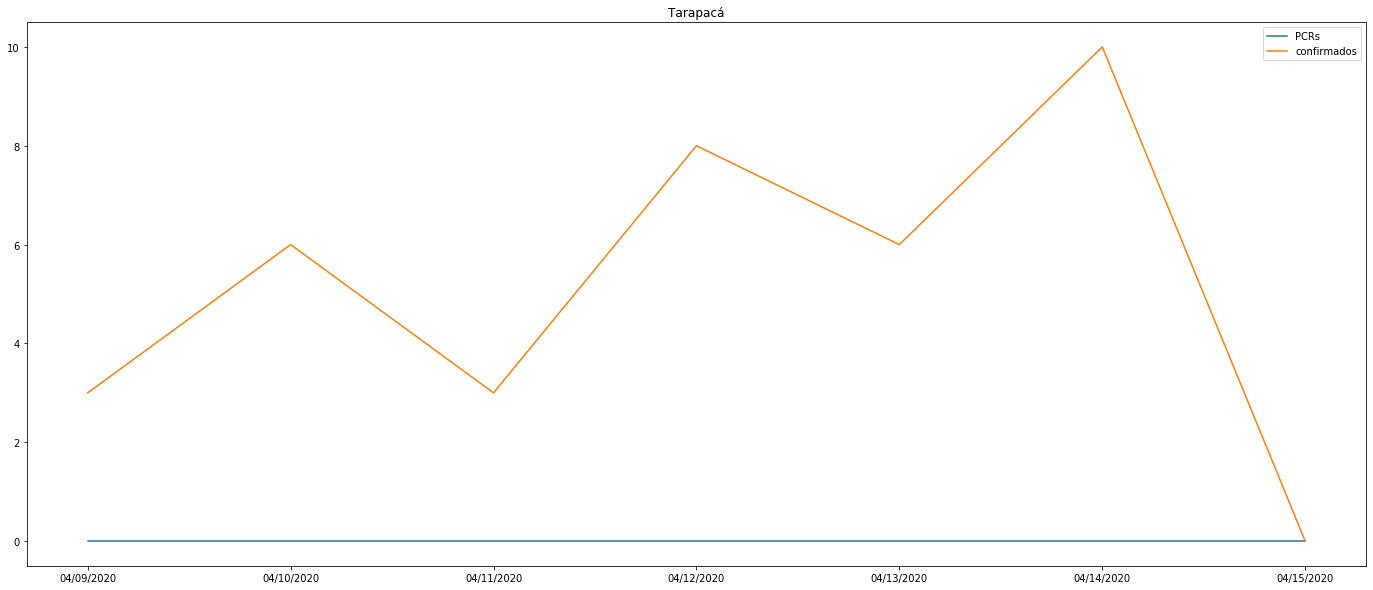

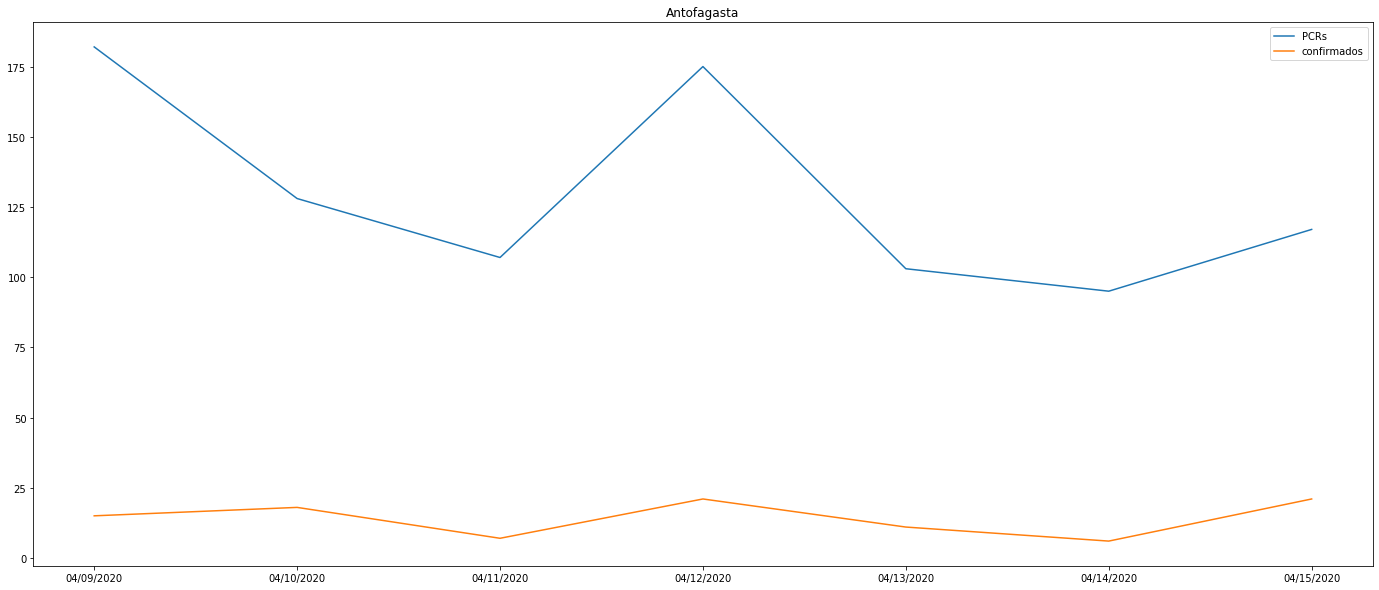

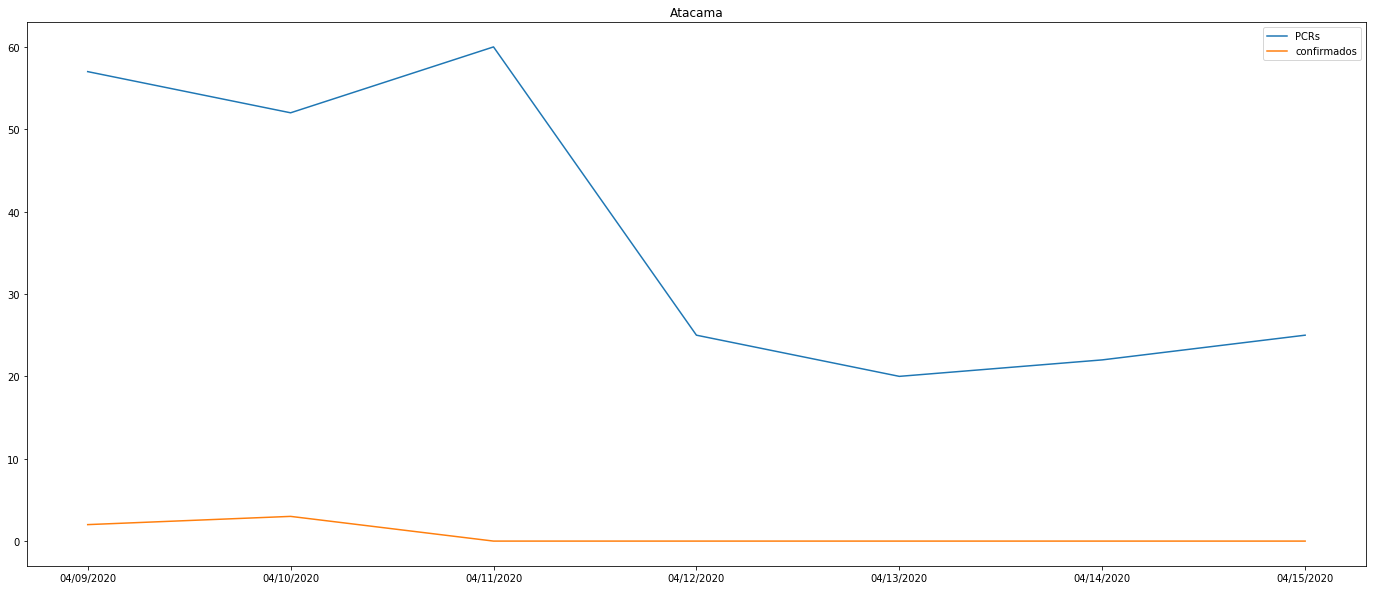

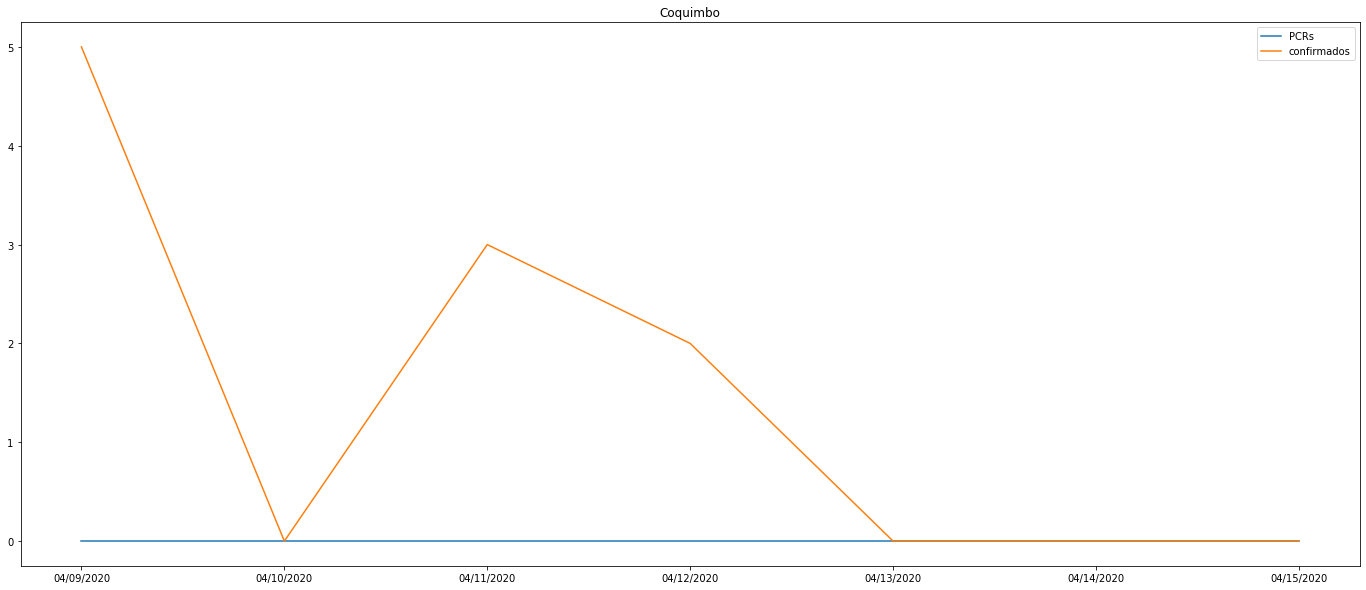

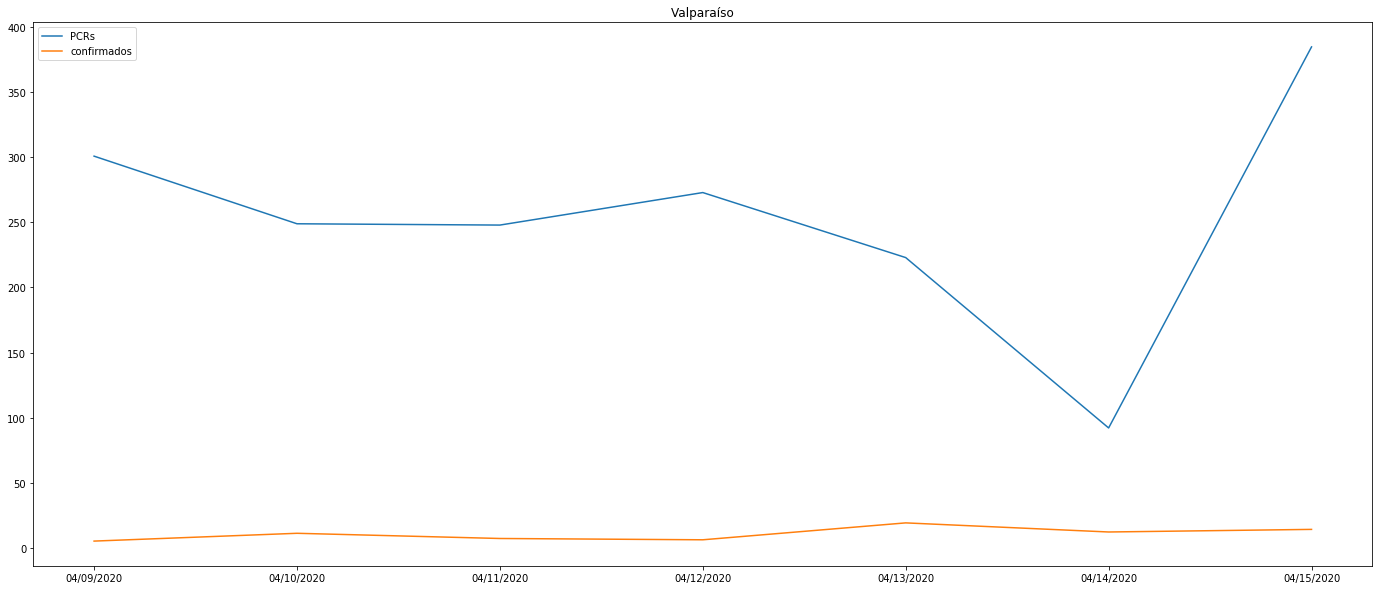

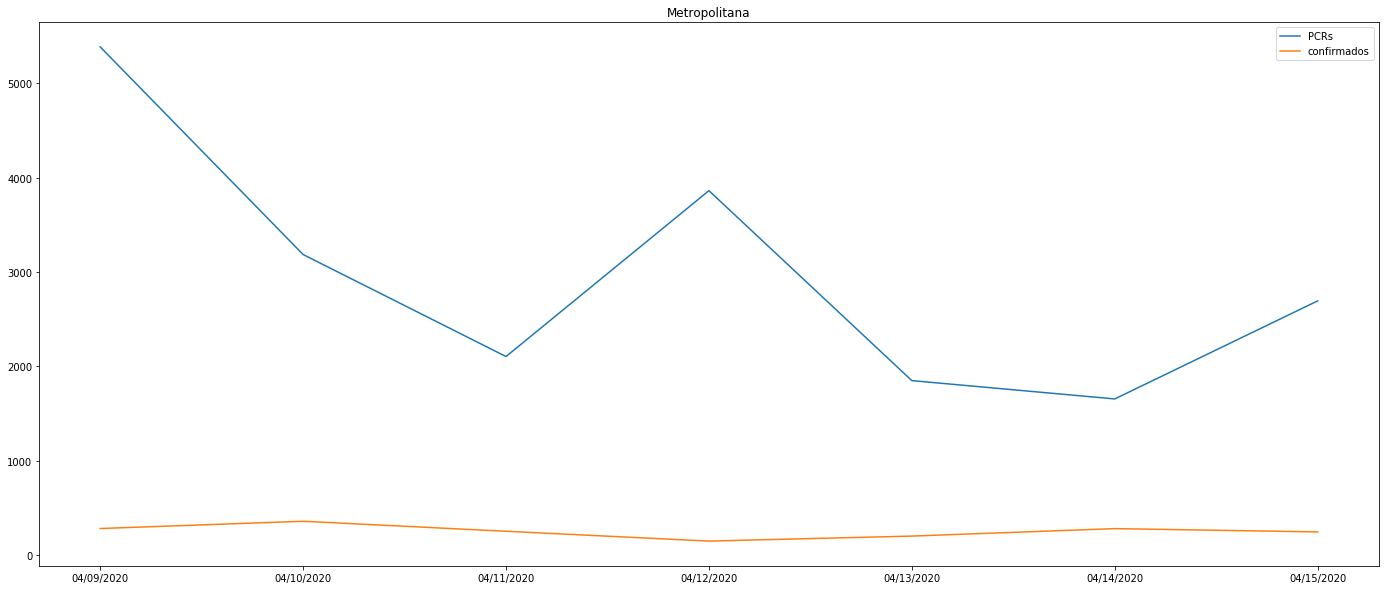

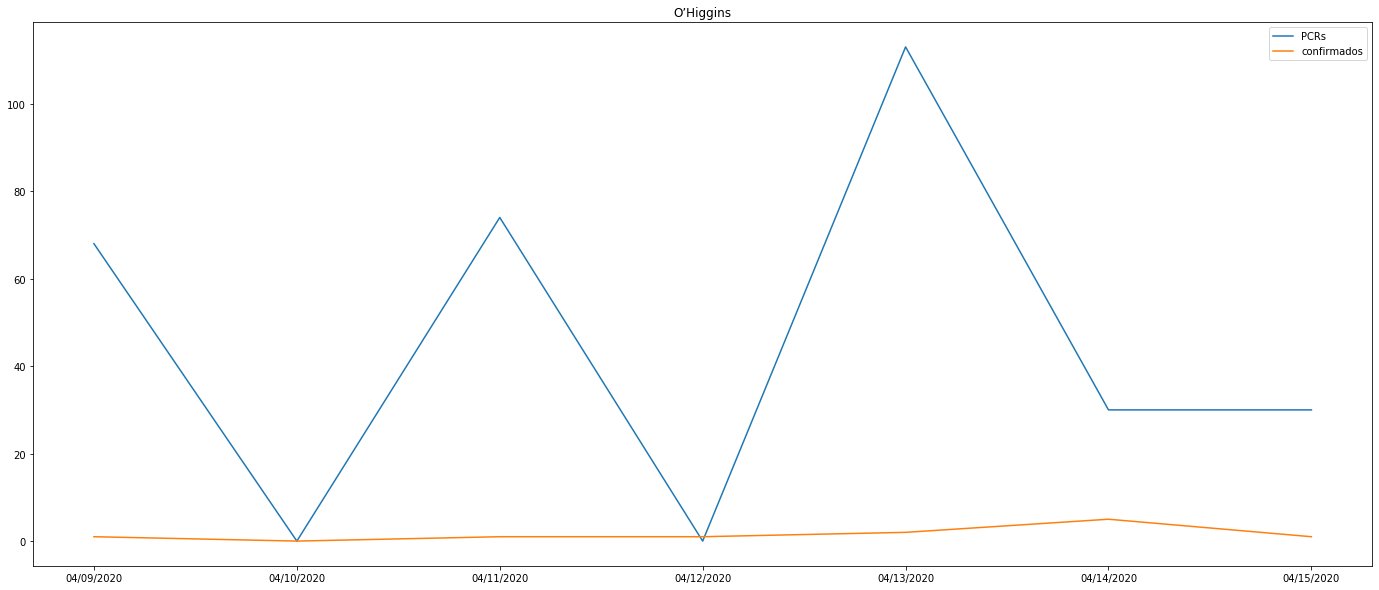

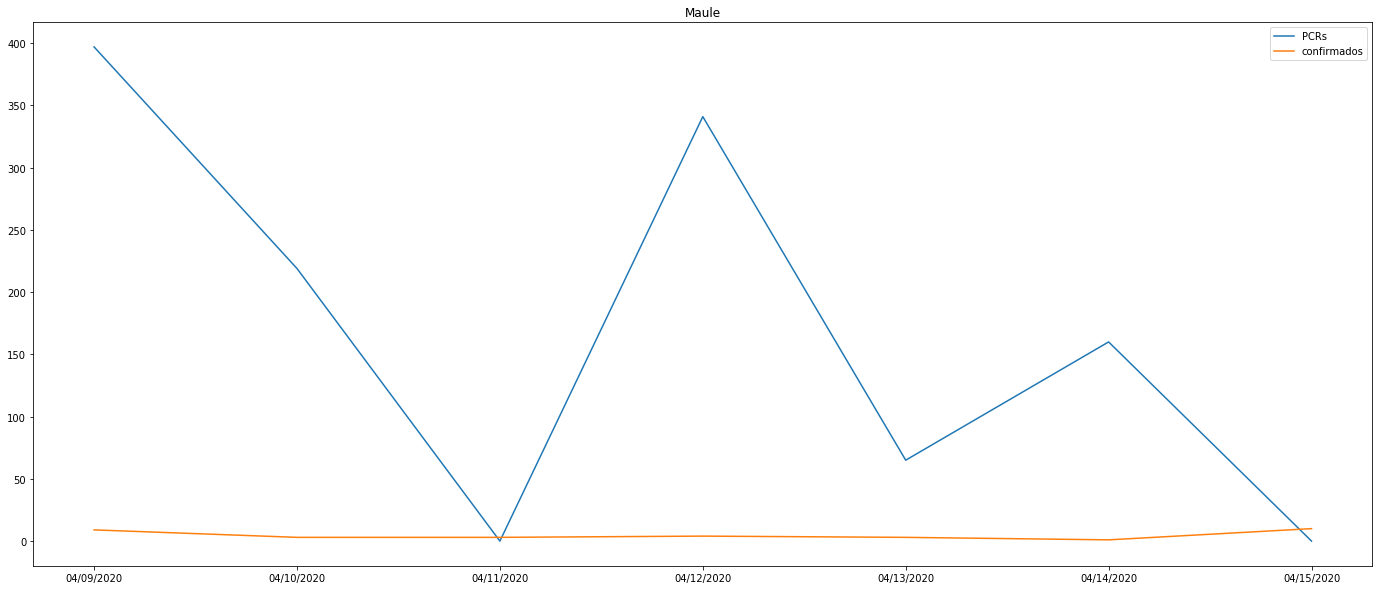

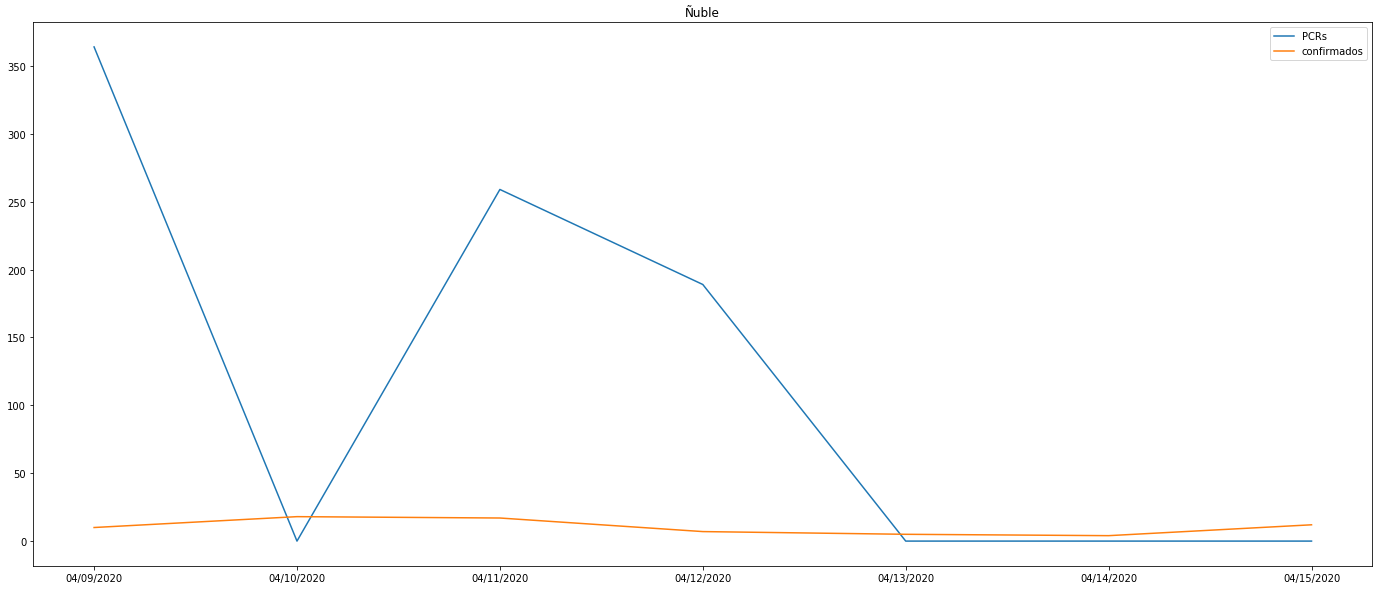

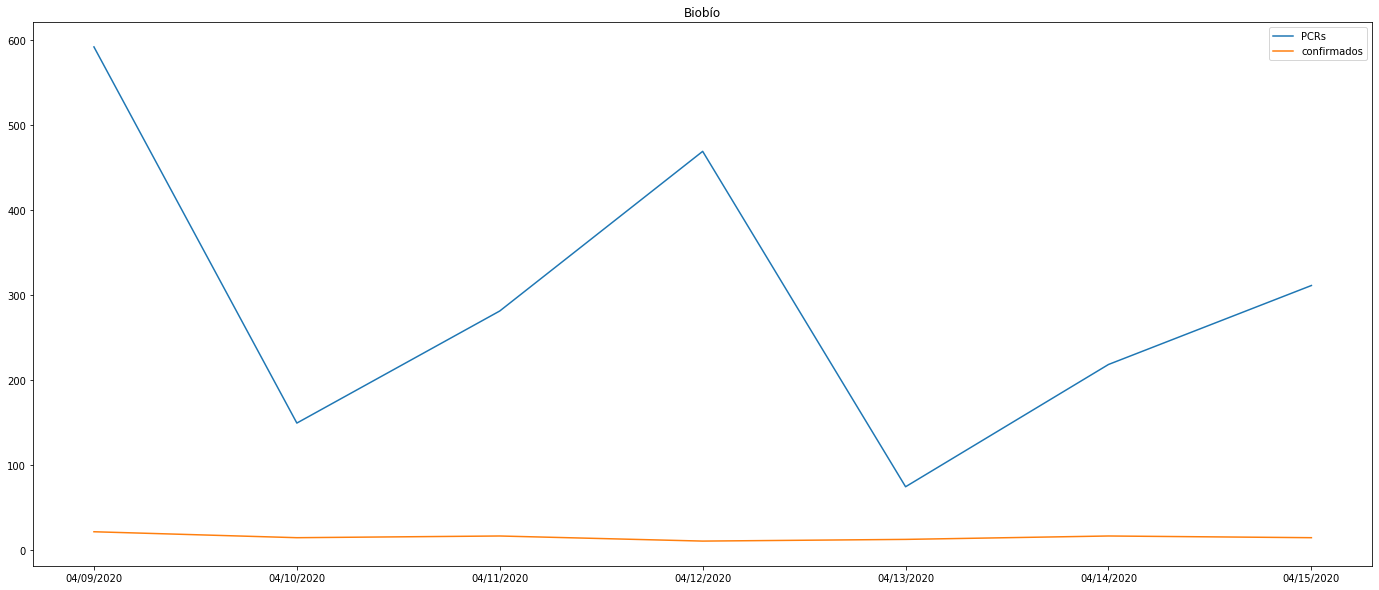

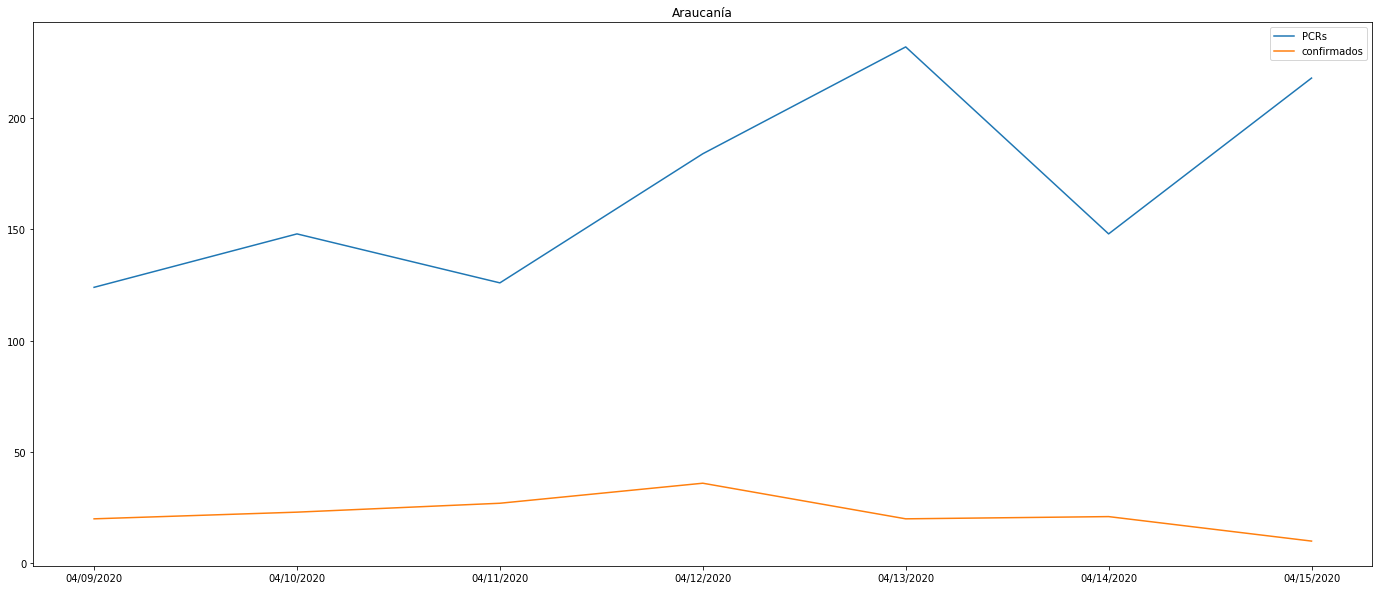

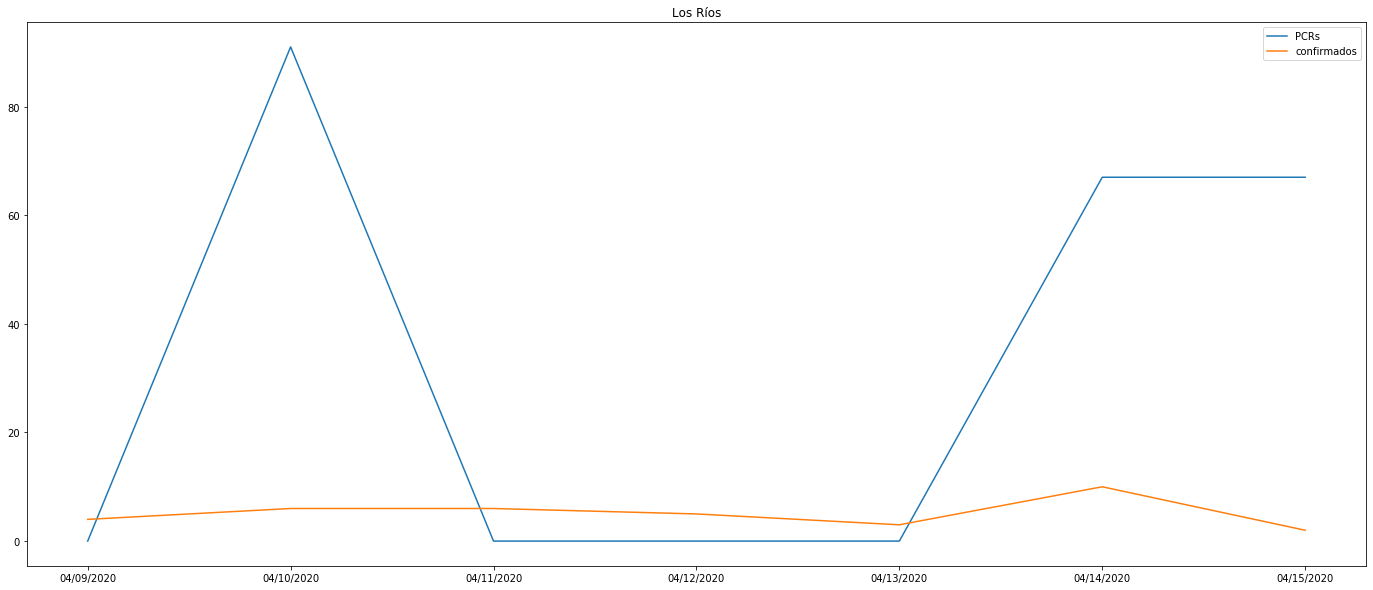

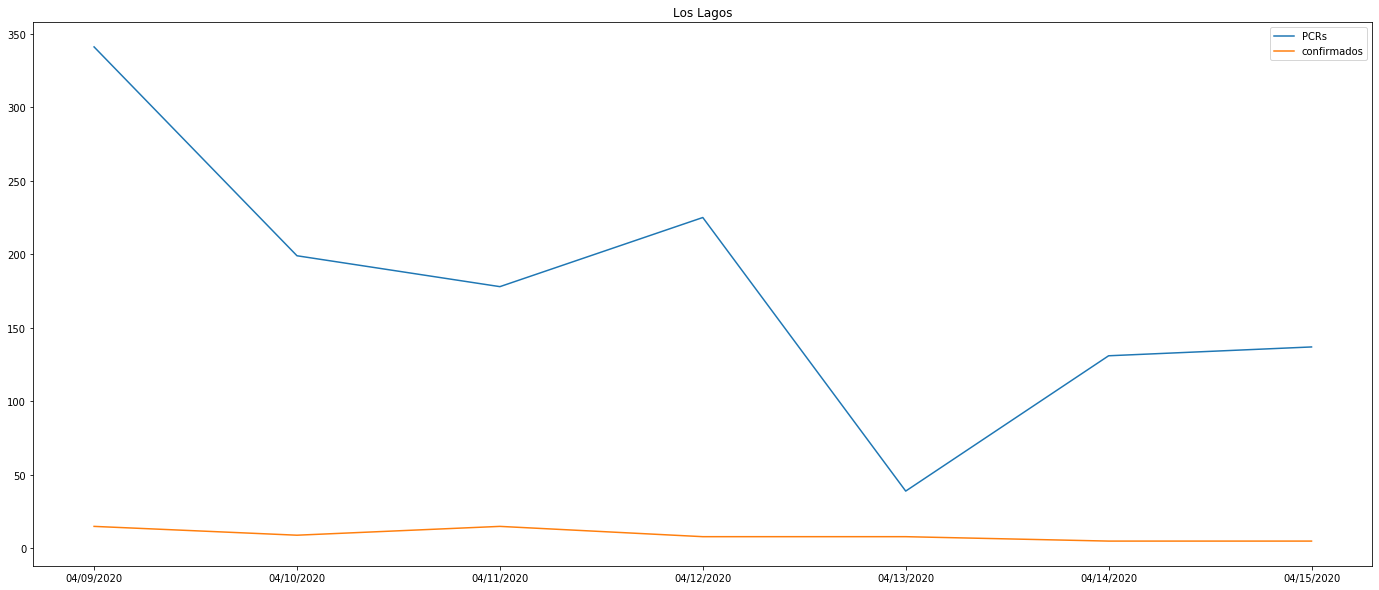

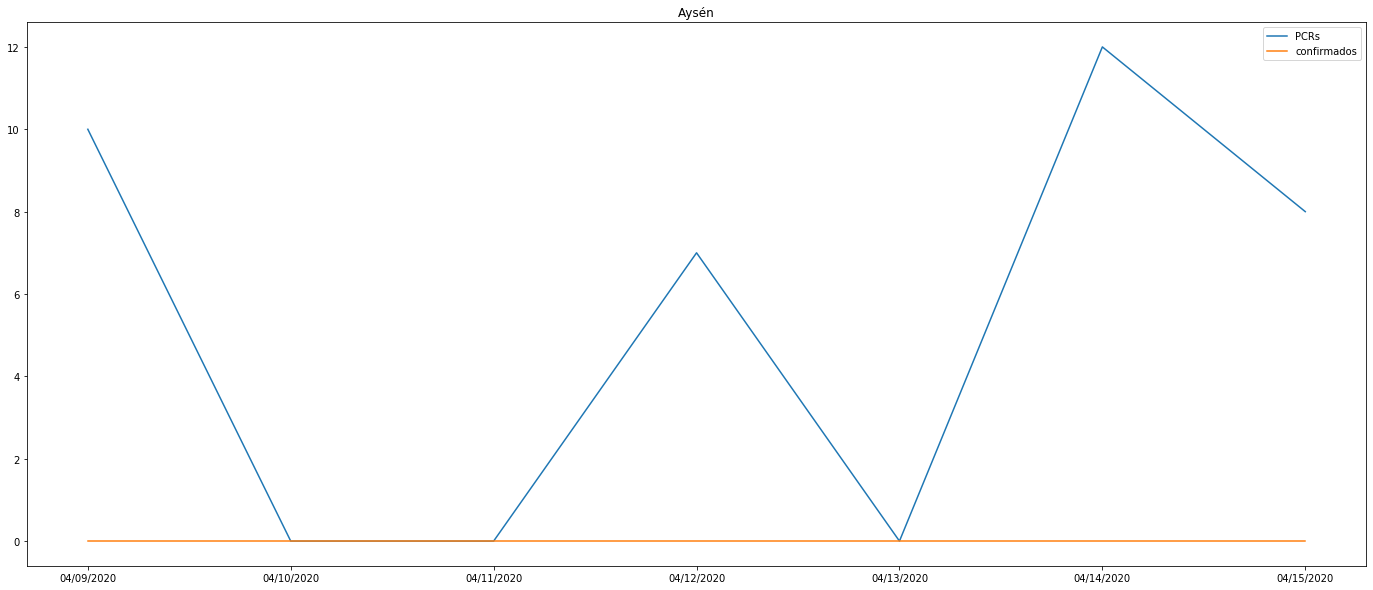

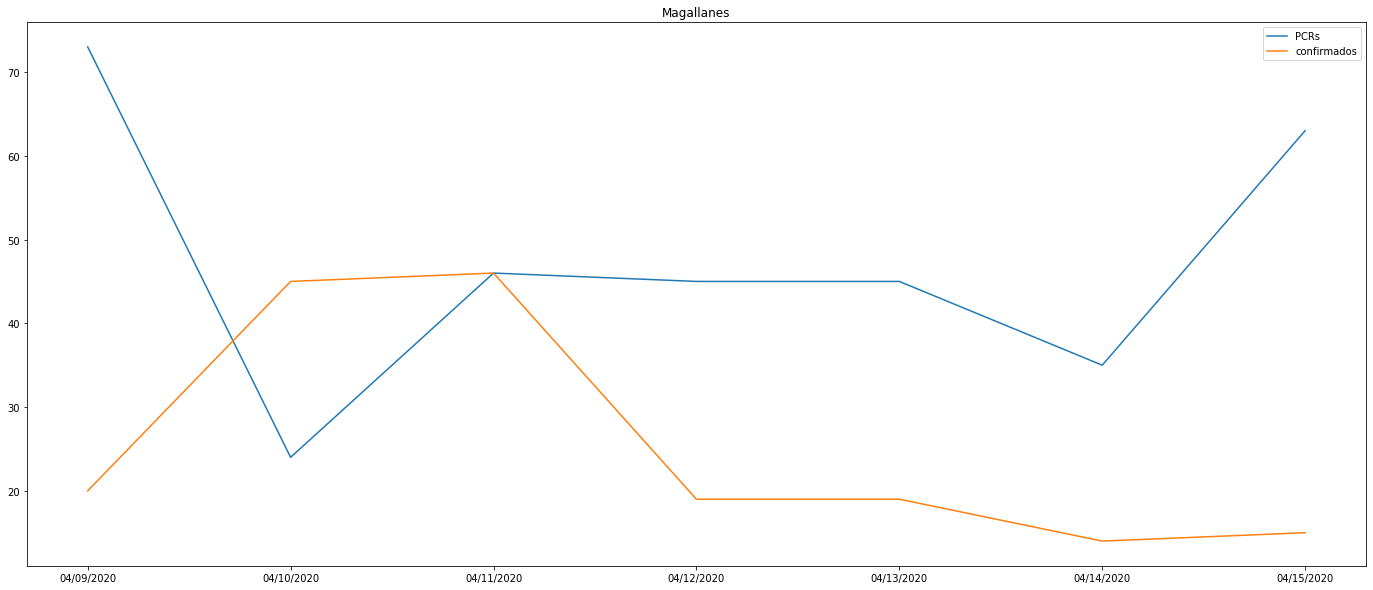

In [79]:
import matplotlib.pyplot as plt

color_map = plt.get_cmap('tab20b')
fechas = pcrs.columns[2:]

for region in confirmados.region.unique():
    fig, ax = plt.subplots(figsize=(24, 10))
    ax.set_title(region)
    local_pcrs = pcrs.query('region == @region')
    ax.plot(local_pcrs.columns[2:], local_pcrs.values[0, 2:], label='PCRs')
    
    local_positivos = positivos.query('region == @region')
    ax.plot(local_pcrs.columns[2:], local_positivos.iloc[0], label='confirmados')
    
    ax.legend()
    plt.show()
    plt.close()